Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!unzip "/content/gdrive/MyDrive/AssignmentData/MalenomaDetection/Dataset.zip" > /dev/null

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [7]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset

data_dir_train = pathlib.Path("./Train/")
data_dir_test = pathlib.Path("./Test/")

In [8]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [9]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [10]:
## Write your train dataset here

## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=0.2,
    subset="training"
)

train_ds

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
## Write your validation dataset here

## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=0.2,
    subset="validation"
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [12]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)
class_names = val_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

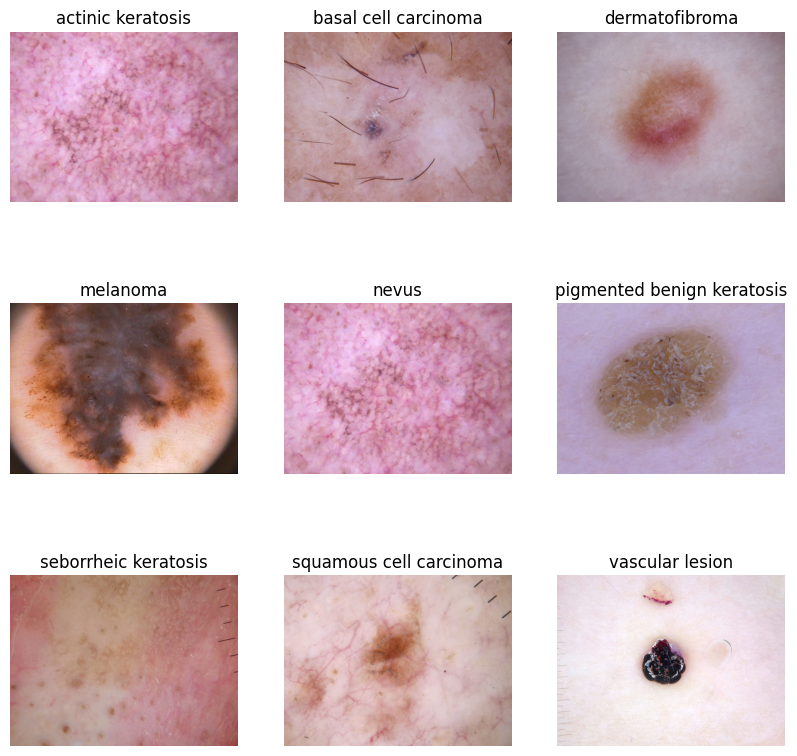

In [13]:
import glob
import skimage
from skimage import io

i = 0
plt.figure(figsize=(10, 10))

for c in class_names:
  path = os.path.join(data_dir_train, c, '*')
  plt.subplot(3, 3, i + 1)
  plt.imshow(io.imread(glob.glob(path)[0]))
  plt.title(c)
  i = i+1
  plt.axis("off")


In [14]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## We are not shuffling the validation dataset so that the accuracy results will be consistent in each epoch

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [16]:
### Your code goes here

from keras import regularizers

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.BatchNormalization(),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [17]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
 5/56 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.1890 - loss: 3.2769 

I0000 00:00:1710863224.340129     114 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1710863224.360654     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


55/56 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3840 - loss: 2.2659

W0000 00:00:1710863228.252795     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


56/56 ━━━━━━━━━━━━━━━━━━━━ 26s 108ms/step - accuracy: 0.3864 - loss: 2.2500 - val_accuracy: 0.0537 - val_loss: 2.8951
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5986 - loss: 1.2293 - val_accuracy: 0.1946 - val_loss: 2.3076
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6988 - loss: 0.9923 - val_accuracy: 0.1544 - val_loss: 2.4517
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7676 - loss: 0.7675 - val_accuracy: 0.1499 - val_loss: 3.6031
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8441 - loss: 0.5187 - val_accuracy: 0.1566 - val_loss: 2.8054
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8964 - loss: 0.4192 - val_accuracy: 0.1723 - val_loss: 3.0306
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9504 - loss: 0.2257 - val_accuracy: 0.2148 - val_loss: 3.0304
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9551 - loss: 0.1745 - val_accuracy: 0.4116 - val_loss: 

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 90, 90, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 45, 45, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 22, 22, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,971,325 (45.67 MB)

 Trainable params: 3,990,281 (15.22 MB)

 Non-trainable params: 480 (1.88 KB)

 Optimizer params: 7,980,564 (30.44 MB)

### Visualizing training results

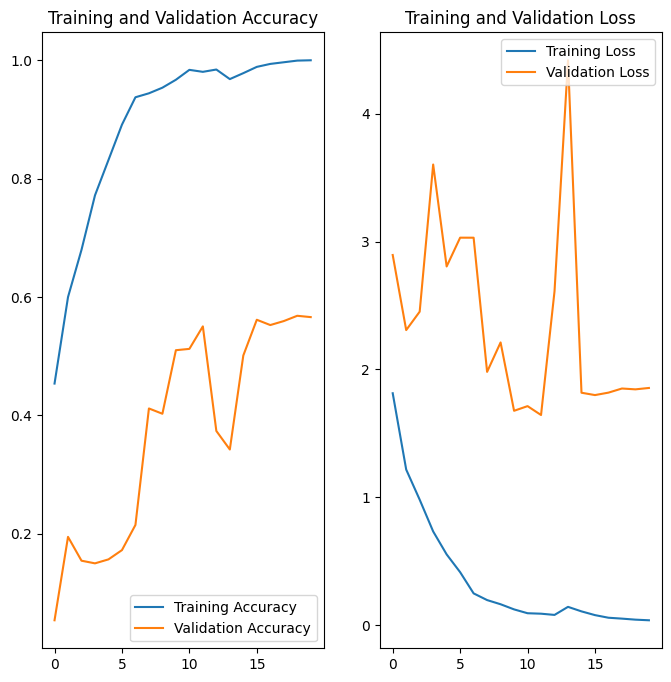

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Model is clearly overfitting.

With 20 epochs the training accouracy is around 99% wheareas the validation accuracy settles around 51% which makes us belive that the model is overfitting.

Also the training loss is decreasing along with each epoch but the validation loss is fluctuating

In [18]:
# Adding Rotation and contrast augmentations to the data


data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),

    layers.RandomRotation(0.2),
    layers.RandomContrast(0.5),
    #layers.RandomZoom(0.5),
  ]
)

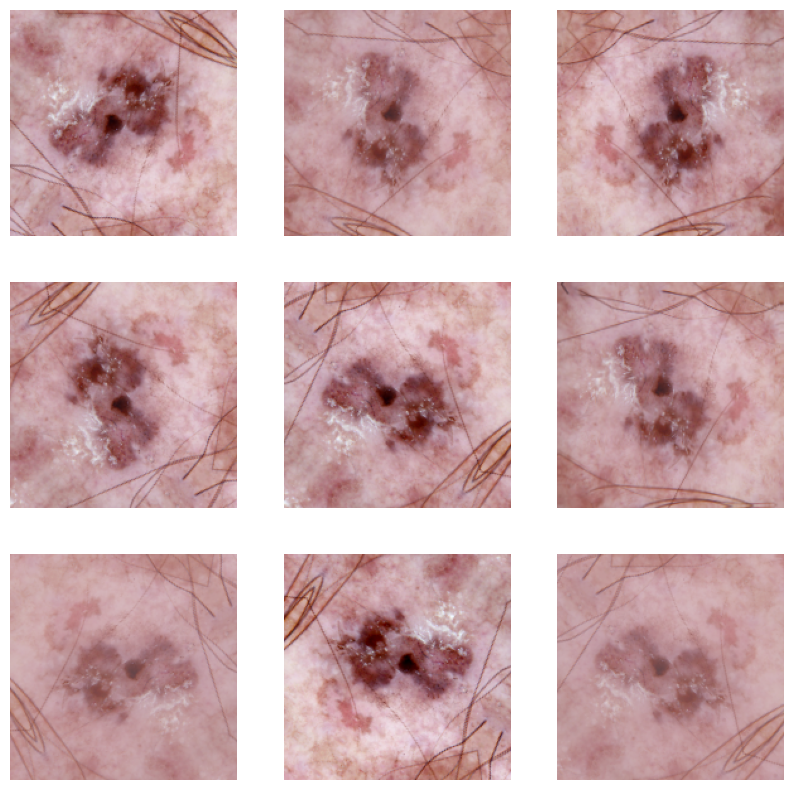

In [19]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here



plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the mode

In [20]:
# Adding 2*2 stride instead of max pooling layer

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(32, 3, strides=(2,2), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)),
  layers.BatchNormalization(),

  layers.Conv2D(64, 3, strides=(2,2), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)),
  layers.BatchNormalization(),

  layers.Conv2D(128, 3, strides=(2,2), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)),
  layers.BatchNormalization(),
  layers.Dropout(0.15),

  layers.Conv2D(256, 3, strides=(2,2), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)),
  layers.BatchNormalization(),
  layers.Dropout(0.20),

  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

### Compiling the model

In [21]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)

Epoch 1/20


2024-03-19 15:47:40.508049: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_2_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.2666 - loss: 9.5799 - val_accuracy: 0.1924 - val_loss: 15.5680
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.4131 - loss: 1.9879 - val_accuracy: 0.1812 - val_loss: 8.4433
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.4717 - loss: 1.6371 - val_accuracy: 0.1119 - val_loss: 6.2881
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.4833 - loss: 1.6080 - val_accuracy: 0.0716 - val_loss: 5.1213
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5030 - loss: 1.5385 - val_accuracy: 0.1342 - val_loss: 3.8955
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5281 - loss: 1.4807 - val_accuracy: 0.1812 - val_loss: 3.0367
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5312 - loss: 1.4802 - val_accuracy: 0.3043 - val_loss: 2.1728
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5447 - loss: 1.3950 - val_accuracy: 0.4072 - val_loss: 

### Visualizing the results

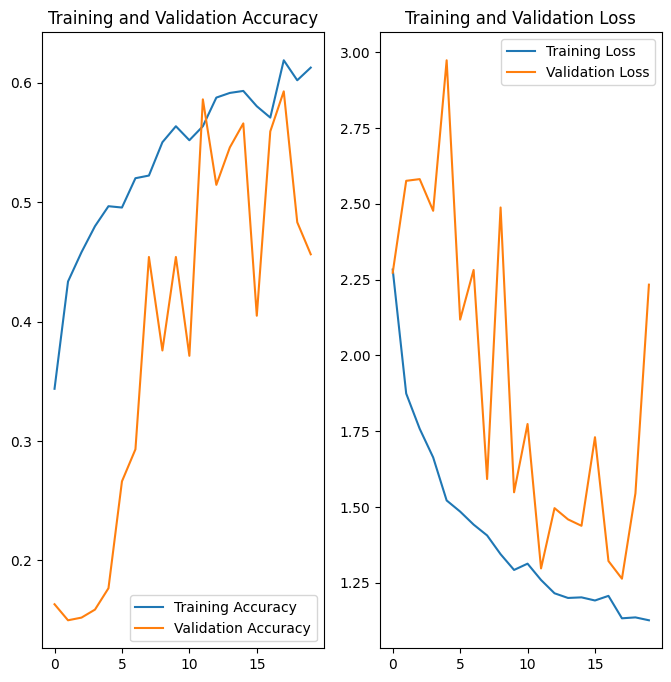

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- There is no evidence of overfitting. Training and validation accuraies are quite close (0.58, 0.54)

- There is evidence of underfitting because training and validation accuracies are quite low (< = 0.5)

- It looks like image augmentation and dropout layer got rid of overfitting but we still need to tackle underfitting problem

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [22]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [23]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
- seborrheic keratosis

#### - Which classes dominate the data in terms proportionate number of samples?
- pigmented benign keratosis

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [24]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [25]:
path_to_training_dataset= str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C70843B8CD0>: 100%|██████████| 500/500 [00:16<00:00, 30.05 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C708419D7E0>: 100%|██████████| 500/500 [00:18<00:00, 26.34 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C7070167070>: 100%|██████████| 500/500 [00:19<00:00, 26.07 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7C701079AEF0>: 100%|██████████| 500/500 [01:40<00:00,  4.95 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C70842B34F0>: 100%|██████████| 500/500 [01:14<00:00,  6.73 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C7077F56FE0>: 100%|██████████| 500/500 [00:15<00:00, 31.75 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C7077F54790>: 100%|██████████| 500/500 [00:36<00:00, 13.53 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C7084112A10>: 100%|██████████| 500/500 [00:15<00:00, 33.19 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C7077F45F00>: 100%|██████████| 500/500 [00:15<00:00, 31.90 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [26]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [27]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Train/melanoma/output/melanoma_original_ISIC_0000292.jpg_fd08517f-42db-4615-ae4e-1d0a2f7ecc78.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0010759.jpg_097ccfc8-9d03-4865-9082-ca887e07b286.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0010579.jpg_d55eaef4-43d4-41c8-bdf7-116ec85f4d96.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0010754.jpg_2fa84d5c-9b0b-4603-9299-2562d3e60cba.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0010355.jpg_a2bc3fa1-7233-448a-89ae-e0d6d0366aca.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0000296.jpg_cf448801-c412-4aaa-8c64-58578ed83256.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0009950.jpg_2e2f6645-a55c-4077-aabd-4bad701b4ab2.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0010527.jpg_9dcce1b7-8c91-49dd-976d-24c51c9c82f1.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0000151.jpg_328414fd-fa2a-4964-8a7f-0ae3b0d3358b.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0000301.jpg_4477e34f-4b3b-4c0b-89db

In [28]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [29]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [30]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-30-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [31]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [32]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [33]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='training',
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [34]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [35]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Adding Model checkpoint to store the best performing model with respect to validation accuracy to refer later
checkpoint = ModelCheckpoint("malenoma_detection.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a validation accuracy metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=10,mode="auto",verbose=1)

#### **Todo:** Create your model (make sure to include normalization)

#### Added some more convolution layers to improve validation accuracy

In [36]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(32, 3, strides=(2,2), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)),
  layers.BatchNormalization(),

  layers.Conv2D(64, 3, strides=(2,2), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)),
  layers.BatchNormalization(),

  layers.Conv2D(128, 3, strides=(2,2), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)),
  layers.BatchNormalization(),
  layers.Dropout(0.15),

  layers.Conv2D(256, 3, strides=(2,2), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)),
  layers.BatchNormalization(),
  layers.Dropout(0.20),

  layers.Conv2D(512, 3, strides=(2,2), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)),
  layers.BatchNormalization(),
  layers.Dropout(0.25),

  layers.Flatten(),
  layers.Dense(1024, activation='relu'),
  layers.Dense(9)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

#### **Todo:**  Train your model

In [37]:
from tensorflow.keras.optimizers import Adam

epochs = 50

# Using decaying learning rate to Adam optimizer so that model converges faster to the global minima
model.compile(
    optimizer=Adam(learning_rate=1e-4, weight_decay=1e-4 / epochs),
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[checkpoint,earlystop]
)

Epoch 1/50


2024-03-19 15:24:58.517155: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_3_1/dropout_2_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3403 - loss: 2.4693
Epoch 1: val_accuracy improved from -inf to 0.13883, saving model to malenoma_detection.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.3406 - loss: 2.4679 - val_accuracy: 0.1388 - val_loss: 2.8107
Epoch 2/50
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4730 - loss: 1.7935
Epoch 2: val_accuracy improved from 0.13883 to 0.15293, saving model to malenoma_detection.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.4731 - loss: 1.7932 - val_accuracy: 0.1529 - val_loss: 3.0672
Epoch 3/50
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4971 - loss: 1.6543
Epoch 3: val_accuracy improved from 0.15293 to 0.31477, saving model to malenoma_detection.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.4972 - loss: 1.6541 - val_accuracy: 0.3148 - val_loss: 2.3292
Epoch 4/50
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5382 - loss: 1.5495
Epoch 4: val_accu

#### **Todo:**  Visualize the model results

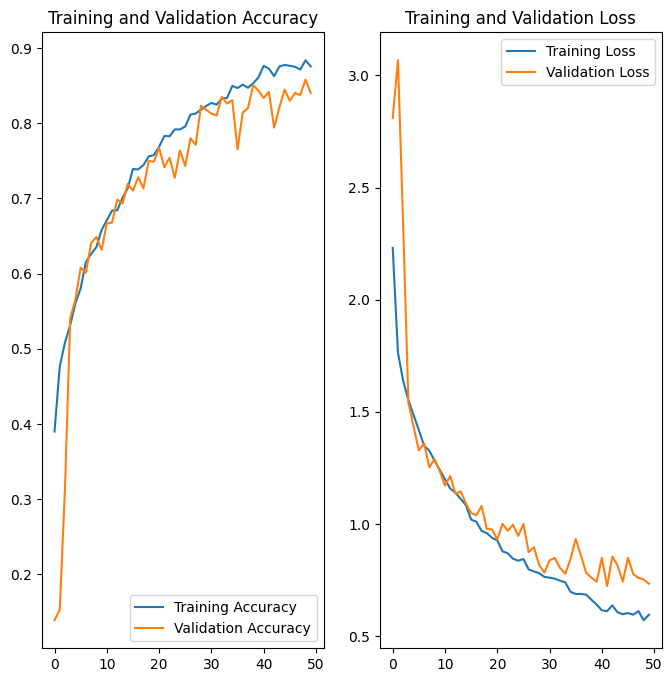

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

if(earlystop.stopped_epoch > 0):
    epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- ##### Class rebalance added some more data to train on different types of skin cancer which remarkably increased the model accuracies.
- ##### Adding few more convolution and dropout layers along with calss rebalance helped getting rid of underfitting and improved the model training accuracy to 86% and validation accuracy to 85%

In [ ]:
test_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,image_size=(img_width,img_height),
                                                            shuffle=False,batch_size=120)
predictions=model.predict(test_ds)
score = tf.nn.softmax(predictions)
_, labels = tuple(zip(*test_ds))
print(labels)
print()
print(np.argmax(score,axis=-1))
print()

from sklearn.metrics import accuracy_score
print('Test Accuracy')
accuracy_score(labels[0].numpy(),np.argmax(score,axis=-1))

Found 118 files belonging to 9 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
(<tf.Tensor: shape=(118,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 8, 8, 8], dtype=int32)>,)

[3 4 4 4 4 4 5 4 0 4 4 4 4 4 0 0 1 7 1 1 7 1 5 5 1 1 5 4 7 1 1 5 3 4 0 4 3
 3 4 2 2 2 2 1 2 5 2 0 4 5 4 4 4 4 1 3 4 3 4 4 4 3 4 4 4 4 4 3 4 4 4 4 4 4
 5 4 4 4 4 4 1 5 5 5 4 5 3 5 0 5 5 5 5 5 0 5 3 3 3 4 5 4 3 4 1 7 5 7 5 1 1
 7 1 7 7 8 5 8]

Test Accuracy


0.4406779661016949

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(labels[0].numpy(), np.argmax(score,axis=-1), average="macro")
print('Test Recall: %f' % recall)

Test Recall: 0.421296


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(labels[0].numpy(), np.argmax(score,axis=-1), average="macro")
print('Test Precision: %f' % precision)

Test Precision: 0.512680


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(labels[0].numpy(), np.argmax(score,axis=-1))
print(matrix)

[[ 3  0  0  1 11  1  0  0  0]
 [ 0  8  0  0  1  4  0  3  0]
 [ 2  1  6  3  3  1  0  0  0]
 [ 0  1  0  3 11  1  0  0  0]
 [ 0  0  0  1 14  1  0  0  0]
 [ 2  1  0  1  1 11  0  0  0]
 [ 0  0  0  3  0  0  0  0  0]
 [ 0  4  0  1  3  3  0  5  0]
 [ 0  0  0  0  0  1  0  0  2]]


In [ ]:
cm_df = pd.DataFrame(matrix,
                     index = class_names,
                     columns = class_names)

<Axes: >

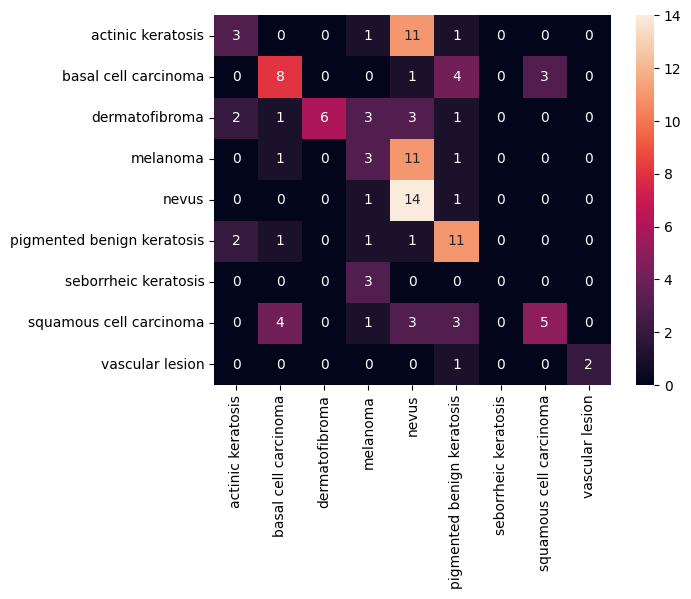

In [ ]:
import seaborn as sns

sns.heatmap(cm_df, annot=True)